In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pylab as pylab

In [2]:
autos = pd.read_csv('autos.csv', encoding='Latin-1')

In [3]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [50]:
autos.shape

(357964, 20)

In [51]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357964 entries, 0 to 371527
Data columns (total 20 columns):
date_crawled          357964 non-null object
name                  357964 non-null object
seller                357964 non-null object
offer_type            357964 non-null object
price_$               357964 non-null int64
abtest                357964 non-null object
vehicle_type          325168 non-null object
registration_year     357964 non-null int64
gearbox               341422 non-null object
powerPS               357964 non-null int64
model                 340252 non-null object
odometer_km           357964 non-null int64
registration_month    357964 non-null int64
fuel_type             329272 non-null object
brand                 357964 non-null object
unrepaired_damage     292873 non-null object
ad_created            357964 non-null object
nr_of_pictures        357964 non-null int64
postal_code           357964 non-null int64
last_seen             357964 non-null obj

Five columns have missing data:
    vehicleType around 10%
    gearbox around 5%
    model around 5%
    fuelType around 10%
    notRepairedDamage around 20%

In [52]:
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price_$', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'powerPS', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

The column names use camelcase instead than snakecase, meaning we cannot replace spaces with underscores.

In [53]:
columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 
           'abtest', 'vehicle_type', 'registration_year', 'gearbox',
           'powerPS', 'model', 'odometer', 'registration_month',
           'fuel_type', 'brand', 'unrepaired_damage', 'ad_created',
           'nr_of_pictures', 'postal_code', 'last_seen']
           
autos.columns = columns

In [54]:
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,powerPS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-24,Golf_3_1.6,private,offer,480,test,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07
1,2016-03-24,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,yes,2016-03-24,0,66954,2016-04-07
2,2016-03-14,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05
3,2016-03-17,GOLF_4_1_4__3TÜRER,private,offer,1500,test,kleinwagen,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17
4,2016-03-31,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,kleinwagen,2008,manual,69,fabia,90000,7,diesel,skoda,no,2016-03-31,0,60437,2016-04-06


In [55]:
autos.describe()

,price,registration_year,powerPS,odometer,registration_month,nr_of_pictures,postal_code
count,357964.000000,357964.000000,357964.000000,357964.000000,357964.000000,357964.0,357964.000000
mean,6035.271647,2003.487529,117.000193,125846.551609,5.818147,0.0,51013.661371
std,12444.693614,7.508159,190.736902,39543.551299,3.674954,0.0,25749.440685
min,100.000000,1923.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1290.000000,1999.000000,74.000000,125000.000000,3.000000,0.0,30827.000000
50%,3100.000000,2004.000000,107.000000,150000.000000,6.000000,0.0,49762.000000
75%,7500.000000,2008.000000,150.000000,150000.000000,9.000000,0.0,71679.000000
max,1000000.000000,2018.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


We can already notice some crazy outliers.
We are going to take care of them soon enough.

In [56]:
autos.rename(columns={'odometer':'odometer_km'}, inplace=True)
autos.rename(columns={'price':'price_$'}, inplace=True)

In [57]:
print(autos['odometer_km'].unique().shape)
print(autos['odometer_km'].describe())
print(autos['odometer_km'].value_counts().sort_index(ascending=True))      

(13,)
count    357964.000000
mean     125846.551609
std       39543.551299
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64
5000        5400
10000       1781
20000       5492
30000       5915
40000       6312
50000       7519
60000       8581
70000       9646
80000      10873
90000      12324
100000     15370
125000     37229
150000    231522
Name: odometer_km, dtype: int64


In [58]:
print(autos['price_$'].unique().shape)
print(autos['price_$'].describe())
print(autos['price_$'].value_counts().sort_index(ascending=True)) 

(5517,)
count     357964.000000
mean        6035.271647
std        12444.693614
min          100.000000
25%         1290.000000
50%         3100.000000
75%         7500.000000
max      1000000.000000
Name: price_$, dtype: float64
100        1027
101           4
105           3
106           1
108           1
110          35
111          15
112           1
115           4
117           4
119           4
120         240
121           1
122           3
123           3
125          51
126           1
127           1
128           1
129           7
130          96
132           1
133           1
135           9
139           4
140          45
142           1
145           6
149          39
150        1607
           ... 
368000        1
370000        2
390000        1
395000        1
399997        1
420000        1
440000        1
445000        1
466000        1
485000        1
487000        1
488997        1
500000        2
517895        1
579000        1
585000        1
599000        1
60

In [59]:
autos = autos[autos["price_$"].between(100,1000000)]

We removed more than 1000 outlier (on 50000), basing on the price, 
deleting the ads with price lower than 100 and higher than 1 million.
We can get the date from the columns date_crawled, ad_created, last_seen. 
It's in the first 10 characters, in the three columns.

In [60]:
import warnings
warnings.filterwarnings('ignore')
autos['date_crawled'] = autos.loc[:,'date_crawled'].str[:10]
autos['ad_created'] = autos.loc[:,'ad_created'].str[:10]
autos['last_seen'] = autos.loc[:,'last_seen'].str[:10]
autos[['date_crawled','ad_created','last_seen']].head()

,date_crawled,ad_created,last_seen
0,2016-03-24,2016-03-24,2016-04-07
1,2016-03-24,2016-03-24,2016-04-07
2,2016-03-14,2016-03-14,2016-04-05
3,2016-03-17,2016-03-17,2016-03-17
4,2016-03-31,2016-03-31,2016-04-06


We extracted the date in three columns:
    date_crawled
    ad_created
    last_seen

count         357964
unique            34
top       2016-04-03
freq           13921
Name: date_crawled, dtype: object
2016-03-05    0.025567
2016-03-06    0.014432
2016-03-07    0.035632
2016-03-08    0.033461
2016-03-09    0.034121
2016-03-10    0.032643
2016-03-11    0.032746
2016-03-12    0.036333
2016-03-13    0.015812
2016-03-14    0.036336
2016-03-15    0.033408
2016-03-16    0.030201
2016-03-17    0.031626
2016-03-18    0.013105
2016-03-19    0.035249
2016-03-20    0.036356
2016-03-21    0.035646
2016-03-22    0.032453
2016-03-23    0.031964
2016-03-24    0.029886
2016-03-25    0.032777
2016-03-26    0.032026
2016-03-27    0.030207
2016-03-28    0.035059
2016-03-29    0.034124
2016-03-30    0.033565
2016-03-31    0.031886
2016-04-01    0.034188
2016-04-02    0.035129
2016-04-03    0.038889
2016-04-04    0.037666
2016-04-05    0.012772
2016-04-06    0.003129
2016-04-07    0.001606
Name: date_crawled, dtype: float64


Text(0.5,1,'Data Crawled')

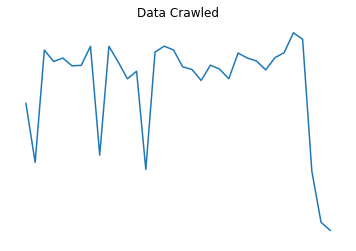

In [61]:
print(autos['date_crawled'].describe())
print(autos['date_crawled'].value_counts(normalize=True, dropna=False).sort_index())
fig = plt.figure(figsize=(6,4))
A = autos['date_crawled'].value_counts(normalize=True, dropna=False).sort_index()
ax = fig.add_subplot(111)
ax.plot(A)
# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.axis('off')
ax.set_title("Data Crawled")

This dataset has 358.143 observations with 34 unique days when ads were crawled.
The last two days are considerably less present, with values of 0.31% and 0.16%.
We can suppose that the observation has stopped shotly thereafter, so no surprise.
Regarding the other 32 unique days, the percentage stays between 1.2% and 3.8%.

count         357964
unique           114
top       2016-04-03
freq           13989
Name: ad_created, dtype: object
2014-03-10    0.000003
2015-03-20    0.000003
2015-06-11    0.000003
2015-06-18    0.000003
2015-08-07    0.000003
2015-08-10    0.000003
2015-09-04    0.000006
2015-09-09    0.000003
2015-10-14    0.000003
2015-11-02    0.000003
2015-11-08    0.000003
2015-11-10    0.000003
2015-11-12    0.000003
2015-11-13    0.000003
2015-11-17    0.000003
2015-11-23    0.000006
2015-11-24    0.000006
2015-12-05    0.000008
2015-12-06    0.000003
2015-12-17    0.000003
2015-12-27    0.000003
2015-12-28    0.000003
2015-12-30    0.000008
2016-01-02    0.000011
2016-01-03    0.000003
2016-01-06    0.000003
2016-01-07    0.000008
2016-01-08    0.000003
2016-01-10    0.000011
2016-01-13    0.000008
                ...   
2016-03-09    0.034168
2016-03-10    0.032517
2016-03-11    0.032771
2016-03-12    0.036174
2016-03-13    0.017083
2016-03-14    0.035274
2016-03-15    0.033333
2016-03-16

Text(0.5,1,'Ad Created')

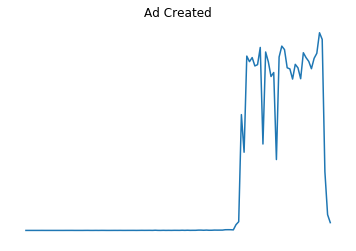

In [62]:
print(autos['ad_created'].describe())
print(autos['ad_created'].value_counts(normalize=True, dropna=False).sort_index())
fig = plt.figure(figsize=(6,4))
B = autos['ad_created'].value_counts(normalize=True, dropna=False).sort_index()
ax = fig.add_subplot(111)
ax.plot(B)
# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.axis('off')
ax.set_title("Ad Created")

In [63]:
# Let's check which days have a traffic higher than 1%
(B[B.values>0.01])

2016-03-05    0.022896
2016-03-06    0.015457
2016-03-07    0.034464
2016-03-08    0.033364
2016-03-09    0.034168
2016-03-10    0.032517
2016-03-11    0.032771
2016-03-12    0.036174
2016-03-13    0.017083
2016-03-14    0.035274
2016-03-15    0.033333
2016-03-16    0.030428
2016-03-17    0.031218
2016-03-18    0.014010
2016-03-19    0.034280
2016-03-20    0.036437
2016-03-21    0.035752
2016-03-22    0.032148
2016-03-23    0.031933
2016-03-24    0.029922
2016-03-25    0.032833
2016-03-26    0.032140
2016-03-27    0.029989
2016-03-28    0.035129
2016-03-29    0.034160
2016-03-30    0.033425
2016-03-31    0.031970
2016-04-01    0.034023
2016-04-02    0.035017
2016-04-03    0.039079
2016-04-04    0.037766
2016-04-05    0.011607
Name: ad_created, dtype: float64

The 'ad crawled' column tells us when an ad has been visited.
We have 114 unique days in our dataset and we can see, from the plot, 
that the traffic gets higher after a certain date.
The day is March the 5th, 2016.

Nothing special in that day, simply after that the traffic is constantly higher.

About a half of the ads has been created different from the other ads' creation day.

count         357964
unique            34
top       2016-04-06
freq           78393
Name: last_seen, dtype: object
2016-03-05    0.001268
2016-03-06    0.004087
2016-03-07    0.005193
2016-03-08    0.007909
2016-03-09    0.009797
2016-03-10    0.011456
2016-03-11    0.012957
2016-03-12    0.023245
2016-03-13    0.008420
2016-03-14    0.012177
2016-03-15    0.016292
2016-03-16    0.016449
2016-03-17    0.028738
2016-03-18    0.006892
2016-03-19    0.016334
2016-03-20    0.019885
2016-03-21    0.020030
2016-03-22    0.020483
2016-03-23    0.018010
2016-03-24    0.019178
2016-03-25    0.018963
2016-03-26    0.015940
2016-03-27    0.016664
2016-03-28    0.022198
2016-03-29    0.023282
2016-03-30    0.023692
2016-03-31    0.024257
2016-04-01    0.023935
2016-04-02    0.024972
2016-04-03    0.025355
2016-04-04    0.025531
2016-04-05    0.126974
2016-04-06    0.218997
2016-04-07    0.130443
Name: last_seen, dtype: float64


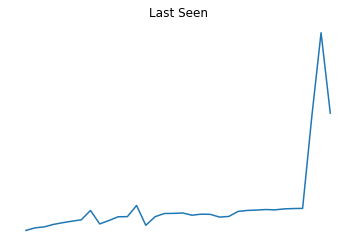

In [64]:
print(autos['last_seen'].describe())
print(autos['last_seen'].value_counts(normalize=True, dropna=False).sort_index())
fig = plt.figure(figsize=(6,4))
C = autos['last_seen'].value_counts(normalize=True, dropna=False).sort_index()
ax = fig.add_subplot(111)
ax.plot(C)
# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.axis('off')
ax.set_title("Last Seen")
plt.show()

In [65]:
autos['registration_year'].describe()

count    357964.000000
mean       2003.487529
std           7.508159
min        1923.000000
25%        1999.000000
50%        2004.000000
75%        2008.000000
max        2018.000000
Name: registration_year, dtype: float64

The outliers have clearly no sense.
No cars can have been produced in the year 1000, or in the year 9999.

In 1913, the Ford Model T, created by the Ford Motor Company five years prior, 
became the first automobile to be mass-produced on a moving assembly line. 

Even though it would be weird to find the first year's Ford T on the German Ebay,
we decide to limit our values between that year, 1913
to the current year, 2018.

In [66]:
autos = autos[autos["registration_year"].between(1913,2018)]
autos['registration_year'].describe()

count    357964.000000
mean       2003.487529
std           7.508159
min        1923.000000
25%        1999.000000
50%        2004.000000
75%        2008.000000
max        2018.000000
Name: registration_year, dtype: float64

99.99% it is a simple mistyping, but we keep it.
Our data will not be affected by these few outliers.

In [67]:
autos['registration_year'].value_counts(normalize=True).sort_index()

1923    0.000008
1925    0.000003
1927    0.000006
1928    0.000006
1929    0.000020
1930    0.000011
1931    0.000011
1932    0.000011
1933    0.000014
1934    0.000011
1935    0.000014
1936    0.000020
1937    0.000034
1938    0.000022
1939    0.000011
1940    0.000006
1941    0.000011
1942    0.000006
1943    0.000014
1944    0.000006
1945    0.000014
1946    0.000006
1947    0.000014
1948    0.000008
1949    0.000008
1950    0.000050
1951    0.000047
1952    0.000031
1953    0.000047
1954    0.000039
          ...   
1989    0.003481
1990    0.006769
1991    0.007358
1992    0.008015
1993    0.009046
1994    0.012831
1995    0.024449
1996    0.028771
1997    0.038794
1998    0.047709
1999    0.061129
2000    0.063456
2001    0.054936
2002    0.052433
2003    0.054642
2004    0.054296
2005    0.060243
2006    0.055779
2007    0.048790
2008    0.044708
2009    0.043228
2010    0.034213
2011    0.033447
2012    0.026106
2013    0.017052
2014    0.013292
2015    0.007951
2016    0.0254

In [68]:
autos['registration_year'].value_counts(normalize=True).sort_values(ascending=False)

2000    0.063456
1999    0.061129
2005    0.060243
2006    0.055779
2001    0.054936
2003    0.054642
2004    0.054296
2002    0.052433
2007    0.048790
1998    0.047709
2008    0.044708
2009    0.043228
1997    0.038794
2010    0.034213
2011    0.033447
1996    0.028771
2017    0.027754
2012    0.026106
2016    0.025430
1995    0.024449
2013    0.017052
2014    0.013292
1994    0.012831
2018    0.010610
1993    0.009046
1992    0.008015
2015    0.007951
1991    0.007358
1990    0.006769
1989    0.003481
          ...   
1950    0.000050
1951    0.000047
1953    0.000047
1954    0.000039
1937    0.000034
1952    0.000031
1938    0.000022
1929    0.000020
1936    0.000020
1933    0.000014
1943    0.000014
1945    0.000014
1947    0.000014
1935    0.000014
1932    0.000011
1931    0.000011
1930    0.000011
1939    0.000011
1934    0.000011
1941    0.000011
1948    0.000008
1949    0.000008
1923    0.000008
1928    0.000006
1944    0.000006
1946    0.000006
1927    0.000006
1942    0.0000

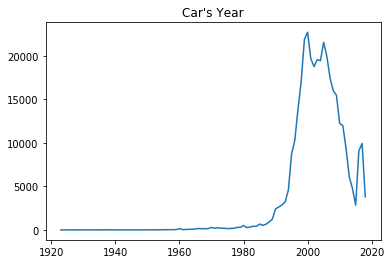

In [69]:
fig = plt.figure(figsize=(6,4))
D1 = autos['registration_year'].value_counts().sort_index()
ax = fig.add_subplot(111)
ax.plot(D1)
# Turn off tick labels
#ax.set_yticklabels([])
#ax.set_xticklabels([])
ax.set_title("Car's Year")
plt.show()

There are two peaks in this curve: 
    the higher from 1999 and 2000,
    the other one from 2005 to 2006.

Interesting that 2016 and 2017 have more ads than the years from 2013 and 2015.

In general, this German Ebay is stronger for cars with more than 10 years.
The 'first' year of the last decade is 2009, which is 12th.

It seems correct to assume that this is a characteristic of worldwide Ebay.

Is there anything that could be done regarding this issue?

In [70]:
Brands = autos['brand'].value_counts(normalize=True).sort_values(ascending=False)
print(Brands)

volkswagen        0.213711
bmw               0.108653
opel              0.107162
mercedes_benz     0.096216
audi              0.088894
ford              0.068686
renault           0.048251
peugeot           0.029983
fiat              0.025947
seat              0.018982
skoda             0.015538
mazda             0.015404
smart             0.014393
citroen           0.014010
nissan            0.013610
toyota            0.012887
hyundai           0.009984
mini              0.009361
sonstige_autos    0.009104
volvo             0.009001
mitsubishi        0.008224
honda             0.007599
kia               0.006945
suzuki            0.006319
alfa_romeo        0.006252
porsche           0.006026
chevrolet         0.004992
chrysler          0.003816
dacia             0.002481
jeep              0.002182
daihatsu          0.002126
land_rover        0.002118
subaru            0.002059
jaguar            0.001682
daewoo            0.001475
saab              0.001441
trabant           0.001319
l

The first five brands are German:
    Volkswagen, Bmw, Opel, Mercedes-Benz, Audi.
From sixth to tenth place we have an American brand and four European ones:
    Ford, Renault, Peugeot, Fiat, Seat.
    
Interesting the absence of Asian cars in this list.
The first one is the Japanese Mazda, 12th.

Checking the best-selling Car Manufacturers in 2017, in Germany, we can see that
the first 6 are the same, with Ford slightly ahead of Opel now.
In the first ten, as number 9, we have Hyundai.
As 7th: Skoda.

Fiat and Peugeot are out of the first ten.

So, we may conclude that Ebay has no specific brands' prevalence.

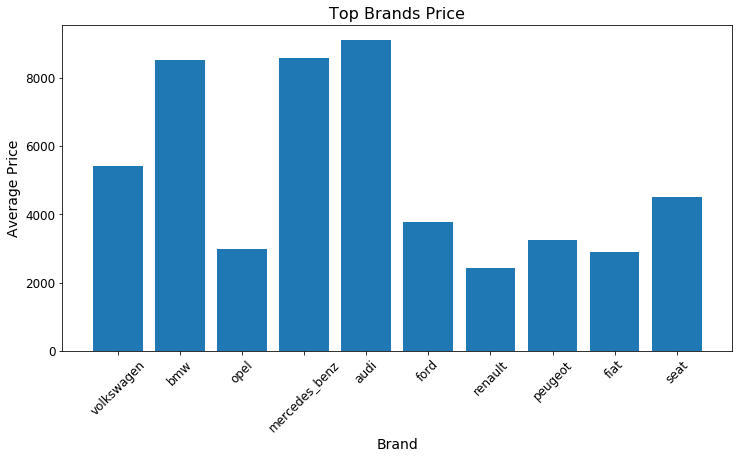

In [71]:
fig = plt.figure(figsize=(12,6))
top_brands = Brands[:10]
top_brands_price = {}
ax = fig.add_subplot(111)
for b in top_brands.index:
    top_brands_price[b] = autos[autos['brand'] == b]['price_$'].mean()
ax.bar(range(len(top_brands_price)), list(top_brands_price.values()), align='center')
ax.set_xticks(np.arange(len(top_brands_price)))
labels = ax.set_xticklabels(labels = list(top_brands_price.keys()),
                            rotation = 45,
                            fontdict = {'fontsize': 12})
ax.set_yticklabels(labels = ['0', '2000', '4000', '6000', '8000'],
                            fontdict = {'fontsize': 12})
plt.xlabel('Brand',
           fontdict = {'fontsize': 14})
plt.ylabel('Average Price',
           fontdict = {'fontsize': 14})
plt.title("Top Brands Price",
           fontdict = {'fontsize': 16})
plt.show()

As we could have imagined, German cars are strong in the luxury segment:
    Bmw, Mercede-Benz and Audi are offered at avg. prices higher than 8000$.

Volkswagen and Seat stay in the middle, with avg. prices between 4000$ & 6000$.

Ford, Peugeot, Opel, Fiat, Renault are sold at a avg. price lower than 4000$.

Let's explore now if there is any difference in the mileage of the cars,
in relationship with their brand.

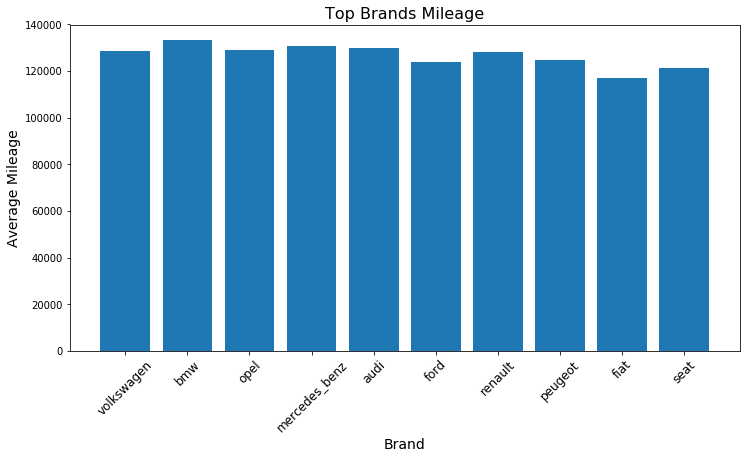

In [72]:
fig = plt.figure(figsize=(12,6))
top_brands_mileage = {}
ax = fig.add_subplot(111)
for b in top_brands.index:
    top_brands_mileage[b] = autos[autos['brand'] == b]['odometer_km'].mean()
ax.bar(range(len(top_brands_mileage)), list(top_brands_mileage.values()), align='center')
ax.set_xticks(np.arange(len(top_brands_mileage)))
labels = ax.set_xticklabels(labels = list(top_brands_mileage.keys()),
                            rotation = 45,
                            fontdict = {'fontsize': 12})
plt.xlabel('Brand',
           fontdict = {'fontsize': 14})
plt.ylabel('Average Mileage',
           fontdict = {'fontsize': 14})
plt.title("Top Brands Mileage",
           fontdict = {'fontsize': 16})
plt.show()

This price difference has no effect on the mileage.

In [73]:
top_brands_price_series = pd.Series(top_brands_price)
top_brands_mileage_series = pd.Series(top_brands_mileage)
top_brands_df = pd.Series.to_frame(top_brands_price_series)
top_brands_df[1] = top_brands_mileage_series
top_brands_df.columns = ['avg. price', 'avg. mileage']
top_brands_df

,avg. price,avg. mileage
volkswagen,5403.148194,128779.362361
bmw,8505.738880,133138.273256
opel,2993.531543,129011.339937
mercedes_benz,8558.227542,130871.610243
audi,9087.566733,129828.100940
ford,3779.448489,123964.493431
renault,2427.619558,128105.604447
peugeot,3253.229013,124874.685549
fiat,2887.747093,117043.496985
seat,4498.249742,121210.448859


Let's change some german words here and there in this dataset:

In [74]:
autos['gearbox'] = autos['gearbox'].replace('automatik', 'automatic')
autos['gearbox'] = autos['gearbox'].replace('manuell', 'manual')
autos['unrepaired_damage'] = autos['unrepaired_damage'].replace('nein', 'no')
autos['unrepaired_damage'] = autos['unrepaired_damage'].replace('ja', 'yes')
autos['fuel_type'] = autos['fuel_type'].replace('benzin', 'petrol')
autos['seller'] = autos['seller'].replace('privat', 'private')
autos['seller'] = autos['seller'].replace('gewerblich', 'commercial')
autos['offer_type'] = autos['offer_type'].replace('Angebot', 'offer')
autos['offer_type'] = autos['offer_type'].replace('Gesuch', 'request')
autos.head()

,date_crawled,name,seller,offer_type,price_$,abtest,vehicle_type,registration_year,gearbox,powerPS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-24,Golf_3_1.6,private,offer,480,test,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07
1,2016-03-24,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,yes,2016-03-24,0,66954,2016-04-07
2,2016-03-14,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05
3,2016-03-17,GOLF_4_1_4__3TÜRER,private,offer,1500,test,kleinwagen,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17
4,2016-03-31,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,kleinwagen,2008,manual,69,fabia,90000,7,diesel,skoda,no,2016-03-31,0,60437,2016-04-06


Now let's check which are the models more present:

In [75]:
brand_model = autos.groupby(["brand", "model"]).size().sort_values(ascending=False)
top_brand_model = brand_model[:10]
top_brand_model

brand          model   
volkswagen     golf        28903
bmw            3er         19873
volkswagen     polo        12529
opel           corsa       12036
               astra       10424
audi           a4           9954
volkswagen     passat       9948
mercedes_benz  c_klasse     8620
bmw            5er          8288
mercedes_benz  e_klasse     7368
dtype: int64

Looking at the first 10 models, we get 3 Volkswagen, 2 Bmw, Mercedes and Opel and 1 Audi. 

In [76]:
df1 = autos[autos['odometer_km'] < 50000]
df2 = autos[(autos['odometer_km'] >= 50000) &  (autos['odometer_km']<100000)]
df3 = autos[(autos['odometer_km']>= 100000) & (autos['odometer_km'] < 150000)]
df4 = autos[(autos['odometer_km'] == 150000)]

print("The number of ads involving cars with less than 50.000 km is " + str(len(df1)))
print("The number of ads involving cars with more than (included the exact value of) 50.000 km and less than 100.000 km is " + str(len(df2)))
print("The number of ads involving cars with more than (included the exact value of) 100.000 km and less than 150.000 km is " + str(len(df3)))
print("The number of ads involving cars with the exact value of 150.000 km is " + str(len(df4)))

The number of ads involving cars with less than 50.000 km is 24900
The number of ads involving cars with more than (included the exact value of) 50.000 km and less than 100.000 km is 48943
The number of ads involving cars with more than (included the exact value of) 100.000 km and less than 150.000 km is 52599
The number of ads involving cars with the exact value of 150.000 km is 231522


More than 60% of the ads are regarding cars with the exact value of 150.000 km.
We should probably interpret this as 'higher than' 150.000 km.

In [77]:
damaged_or_not_damaged = autos.groupby("unrepaired_damage").mean()
damaged_or_not_damaged['price_$']

unrepaired_damage
no     7167.760645
yes    2349.558773
Name: price_$, dtype: float64

An undamaged car is sold at a price in average three times of a damaged one.

In [78]:
seller = autos.groupby("seller").mean()
seller['price_$']

seller
commercial    2700.0000
private       6035.2996
Name: price_$, dtype: float64

Apparently, private sellers sell at a higher price.
Let's see if we can get other information from the seller variable just built:

In [79]:
seller

,price_$,registration_year,powerPS,odometer_km,registration_month,nr_of_pictures,postal_code
seller,,,,,,,
commercial,2700.0000,1991.000000,46.333333,123333.333333,8.666667,0.0,48939.666667
private,6035.2996,2003.487634,117.000785,125846.572671,5.818123,0.0,51013.678753


There is a huge difference, 12 years, in the registration year.
Private seller in Germany sell through Ebay oldest cars!

In [80]:
fuel_type = autos.groupby("fuel_type").mean()
fuel_type['price_$']

fuel_type
andere      4271.179487
cng         4800.157324
diesel      8620.546959
elektro    18858.207921
hybrid     14945.634686
lpg         4442.139410
petrol      5113.055007
Name: price_$, dtype: float64

Petrol cars are sold at an average price of around 5.000 dollars.
Diesel at more than 8.500 dollars.
Hybrid at almost 15.000 dollars and electronic at alm almost 19.000 dollars.
Everything as expected.

In [81]:
offer_type = autos.groupby("offer_type").size()
offer_type

offer_type
offer      357958
request         6
dtype: int64